<a href="https://colab.research.google.com/github/LarissaRandow/aula_10/blob/main/aula_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
import random

[Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data): Dataset sobre dados de pacientes e as chances de ocorrer um ataque cardiaco

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [3]:
import os

fname = os.path.join("heart.csv")

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

# Remover as linhas que não têm todas as características
lines = [line for line in lines if len(line.split(',')) == len(header)]

# Eu embaralhei os dados pois os outputs estavam ordenados por 0 e 1
random.shuffle(lines)


print(header)
print(len(lines))

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
303


In [4]:
import numpy as np
temperature = np.zeros(len(lines))
raw_data = np.zeros((len(lines), len(header)))

for i, line in enumerate(lines):
  values = [(x) for x in line.split(',')]
  temperature[i] = values[13]
  raw_data[i, :] = values[:]

temperature

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1.

# Dataset

In [5]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
(num_train_samples, num_val_samples, num_test_samples)

(151, 75, 77)

In [6]:
sampling_rate = 1
sequence_length = 1
delay = sampling_rate
batch_size = 151
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    end_index = num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = num_train_samples,
    end_index = num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = num_train_samples + num_val_samples)

In [7]:
for samples, targets in train_dataset:
  print("samples shape", samples.shape, flush=True)
  print("targets shape", targets, flush=True)
  break

samples shape (151, 1, 14)
targets shape tf.Tensor(
[0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1.], shape=(151,), dtype=float64)


# Baseline

trtbps:  resting blood pressure (in mm Hg)

output: 0= less chance of heart attack 1= more chance of heart attack

In [15]:

def evaluate_naive_method(dataset):
  total_abs_err = 0.
  samples_seen = 0
  for samples, targets in dataset:
    # A minha ideia era fazer uma média das pressões se fosse menor retornava 0 | se fosse maior retornava 1
    #Como não consegui a minha baseline é só retorna 0
    preds = 0
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
  return total_abs_err / samples_seen


print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 0.60
Test MAE: 0.49


In [29]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)

#troquei a ativação para sigmoid por ser 0 ou 1
x = layers.Dense(16, activation="sigmoid")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model.save("jena_dense.keras")
model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/1 [==============================] - 1s 934ms/step - loss: 10.3937 - mae: 3.1838 - val_loss: 10.4820 - val_mae: 3.1999
Epoch 2/10
1/1 [==============================] - 0s 180ms/step - loss: 10.1887 - mae: 3.1513 - val_loss: 10.3358 - val_mae: 3.1771
Epoch 3/10
1/1 [==============================] - 0s 170ms/step - loss: 10.0411 - mae: 3.1283 - val_loss: 10.2044 - val_mae: 3.1563
Epoch 4/10
1/1 [==============================] - 0s 169ms/step - loss: 9.9176 - mae: 3.1089 - val_loss: 10.0906 - val_mae: 3.1382
Epoch 5/10
1/1 [==============================] - 0s 412ms/step - loss: 9.8157 - mae: 3.0927 - val_loss: 9.9946 - val_mae: 3.1230
Epoch 6/10
1/1 [==============================] - 0s 163ms/step - loss: 9.7197 - mae: 3.0772 - val_loss: 9.9114 - val_mae: 3.1098
Epoch 7/10
1/1 [==============================] - 0s 252ms/step - loss: 9.6226 - mae: 3.0614 - val_loss: 9.8390 - val_mae: 3.0981
Epoch 8/10
1/1 [==============================] - 0s 191ms/step - loss: 9.5280 - ma

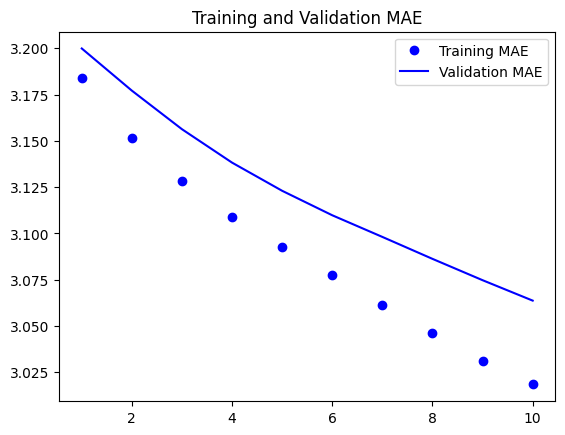

In [30]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()